# Проект по спринту 8 "Принятие рещений в бизнесе на основе данных"

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез.

Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Шаг 1. Изучение общей информации

#### 1.1. Импорт библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import scipy.stats as stats
import datetime as dt
# показывать все колонки
pd.set_option('display.max_columns',40)
# отображение чисел без плавающей точки
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### 1.2. Информация о данных

In [2]:
# формирование DataFrame
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
# сделаем, чтобы ширина колонок подстраивалась под содержимое
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


DataFrame hypothesis содержит следующие колонки:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Шаг 2. Приоритизация гипотез.

### 2.1. Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [5]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### Вывод

Самая перспективная гипотеза номер 8. Немного менее перспективные гипотезы о и 7. Самые неперспективные гипотезы 4, 3 и 5. 

### 2.2. Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


#### Вывод

Самая перспективная гипотеза номер 7 причем следующая по RICE отличается в два раза - гипотеза номер 2. Третье место занимает гипотеза номер 0.

Неперспективные 4, 5, 1.

### Вывод

Объединяя полученные сведения по гипотезам, получаем, что в обоих случаях в тройку приоритетных гипотез входят 7 и 0. Стоит отметить, что гипотеза 7 имеет самый высокий показатель Reach.

Гипотезы 4 и 5 являются неперспективными по результатам расчета  RICE и ICE.

Есть и отличия. Гипотеза 8 по ICE занимает первое место, в то время как по RICE она находится в середине списка. Аналогично гипотеза 2 по RICE на втором месте, а по ICE находится в середине списка.

<font color='blue'> Хорошо, все показатели рассчитаны верно, выводы правильные. </font>

## Часть 2. Анализ A/B-теста

### Шаг 3. Изучение общей информации

In [8]:
# формирование DataFrame
orders = pd.read_csv('/datasets/orders.csv', sep=',')

In [9]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# формирование DataFrame
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [13]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#### Вывод

Получили два DataFrame: orders и visitors.

DataFrame orders содержит следующие колонки:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

DataFrame visitors содержит следующие колонки:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Колонки с датами приведены к форматам дат.

### Шаг 4. Анализ A/B-теста

#### Задача 1. 

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

##### Решение:

Выполним подготовку данных.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

In [17]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'График выручки групп А и В')

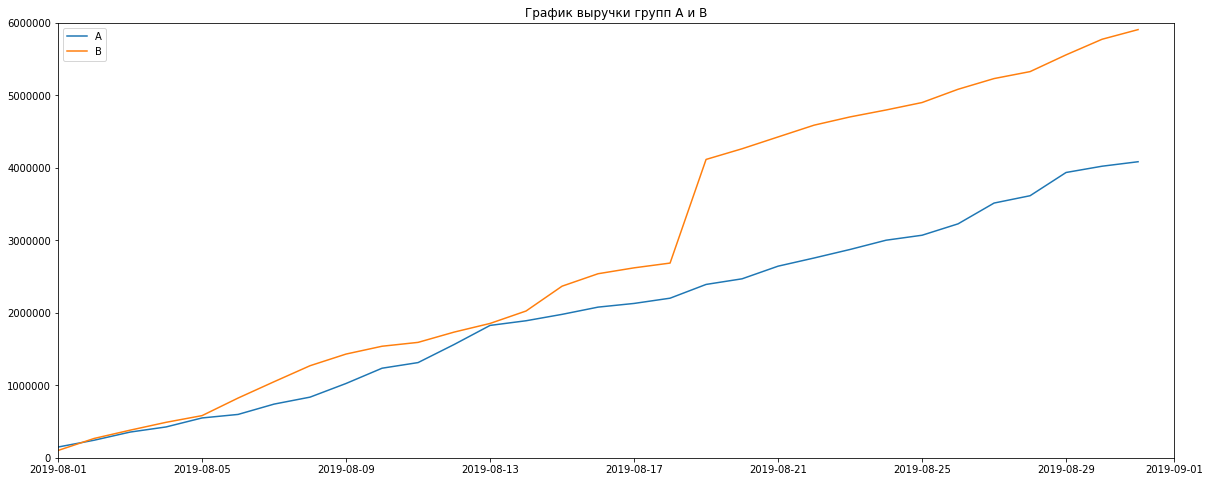

In [21]:
plt.figure(figsize=(20,8))
# Строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.axis(["2019-08-01", '2019-09-01', 0, 6000000])
plt.legend()
plt.title('График выручки групп А и В')

##### Вывод

Выручка почти равномерно увеличивается в течение всего теста. Выручка группы А сначала практически совпадает с выручкой группы В, но далее В начинает расти несколько большими темпами. В графике В есть период резкого роста это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<font color='blue'> Все верно. </font>

#### Задача 2. 

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

##### Решение:

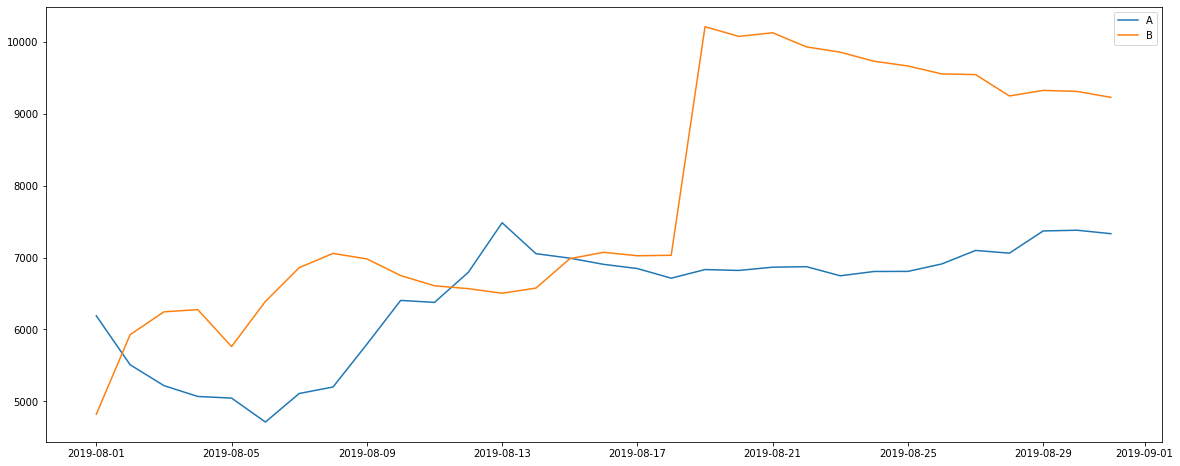

In [22]:
plt.figure(figsize=(20,8))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()


##### Вывод

Из графиков видно, что на старте средний чек группы В был меньше, но далее в группе А был спад и соответственно средний чек группы В стал больше.
Далее в среднем чеке группы В есть резкий скачок вверх, после которого небольшое постепенноге уменьшение значения. Именно за счет этого скачка показатель группы В больше. Скорее всего данный скачок вызван некоторым количеством очень дорогих заказов. Данный скачок виден также и на предыдущем графике по выручке.

#### Задача 3. 

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

##### Решение:

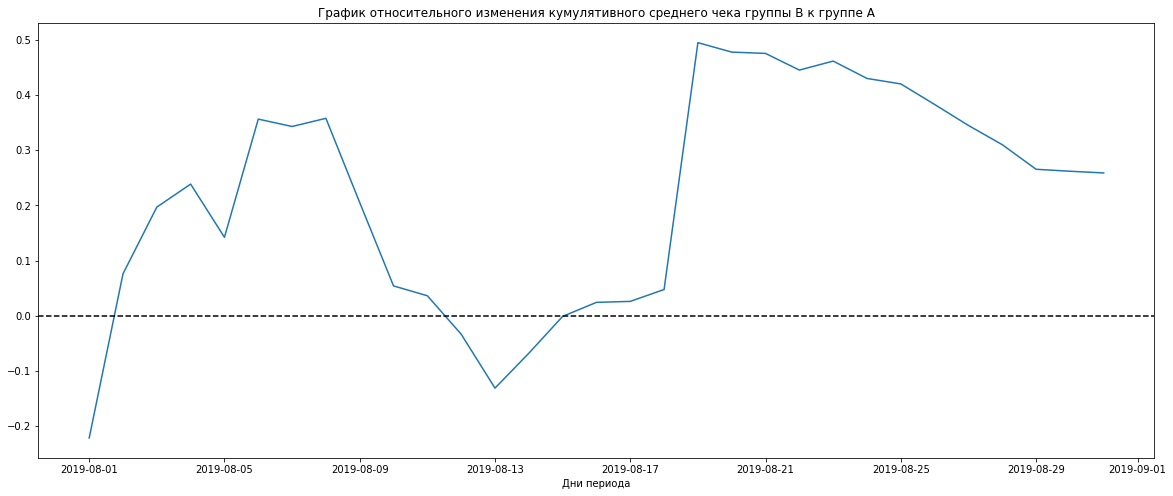

In [23]:
mergedCummulativeRevenue = (cummulativeRevenueA.merge(cummulativeRevenueB
                                                      , left_on=['date']
                                                      , right_on=['date']
                                                      , how='left'
                                                      , suffixes=['A', 'B']))
# cтроим отношение средних чеков
plt.figure(figsize=(20,8))
(plt.plot(mergedCummulativeRevenue['date']
          , (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])
          /(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1))

plt.xlabel('Дни периода')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

##### Вывод

В нескольких точках график различия между сегментами резко «скачет». В основном по графику группа В лучше группы А, скорее всего причина в скачке выручки группы В. Видно, что в последней части графика линия значения идет на спад, т.е. пошли улучшения в группе А и(или) ухудшения в группе В.

#### Задача 4. 

Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

##### Решение:

In [24]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

In [26]:
# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

In [27]:
cummulativeDataA

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.03
2,2019-08-02,A,44,38,242401,1338,0.03
4,2019-08-03,A,68,62,354874,1845,0.04
6,2019-08-04,A,84,77,425699,2562,0.03
8,2019-08-05,A,109,100,549917,3318,0.03
10,2019-08-06,A,127,114,598401,3985,0.03
12,2019-08-07,A,145,131,740818,4629,0.03
14,2019-08-08,A,161,146,837097,5239,0.03
16,2019-08-09,A,177,159,1025603,5856,0.03
18,2019-08-10,A,193,175,1236098,6262,0.03


In [28]:
cummulativeDataB

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.03
3,2019-08-02,B,45,43,266748,1294,0.03
5,2019-08-03,B,61,59,380996,1803,0.03
7,2019-08-04,B,78,75,489567,2573,0.03
9,2019-08-05,B,101,98,581995,3280,0.03
11,2019-08-06,B,129,123,824337,3935,0.03
13,2019-08-07,B,153,146,1049671,4644,0.03
15,2019-08-08,B,180,171,1270589,5298,0.03
17,2019-08-09,B,205,193,1431401,5908,0.03
19,2019-08-10,B,228,215,1539203,6277,0.04


['2019-08-01', '2019-09-01', 0.02, 0.04]

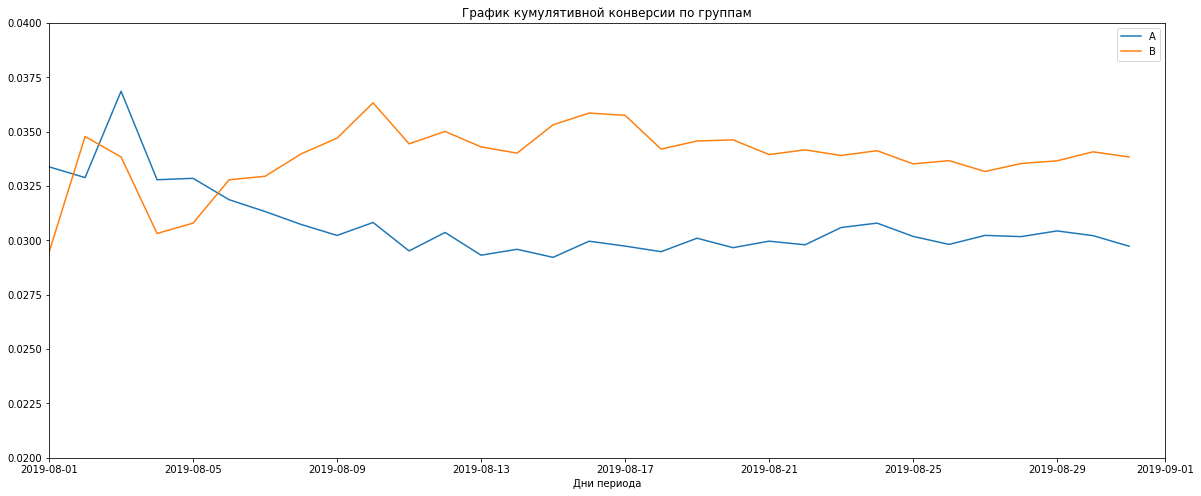

In [29]:
# строим графики
plt.figure(figsize=(20,8))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дни периода')
plt.title('График кумулятивной конверсии по группам')
# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.020, 0.04])

##### Вывод

Сначала группы колебались довольно резко, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Задача 5. 

Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

##### Решение:

In [30]:
mergedCummulativeConversions = (cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']]
                                                                              , left_on='date', right_on='date'
                                                                              , how='left', suffixes=['A', 'B']))

['2019-08-01', '2019-09-01', -0.2, 0.3]

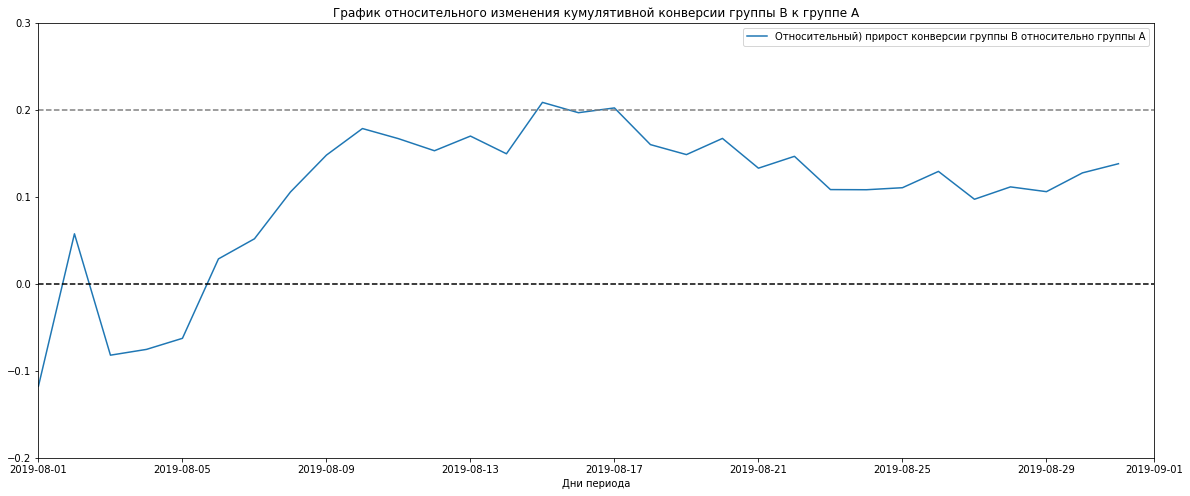

In [31]:
plt.figure(figsize=(20,8))
(plt.plot(mergedCummulativeConversions['date']
          , mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1
          , label="Относительный) прирост конверсии группы B относительно группы A"))
plt.legend()
plt.xlabel('Дни периода')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])

##### Вывод

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. И после некоторого спада ближе к концу снова группа В начала расти относительно группы А.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. 

#### Задача 6. 

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

##### Решение:

In [32]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId' : pd.Series.nunique}))

ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Text(0.5, 1.0, 'Гистограмма распределения количества заказов на одного пользователя')

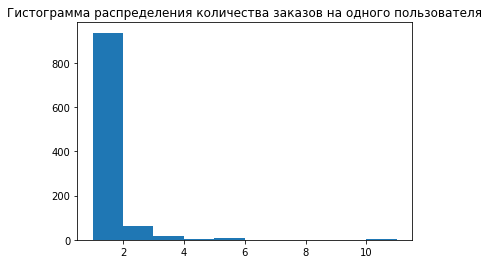

In [33]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения количества заказов на одного пользователя')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2 заказами тоже значительна.

Text(0.5, 1.0, 'График количества заказов по пользователям')

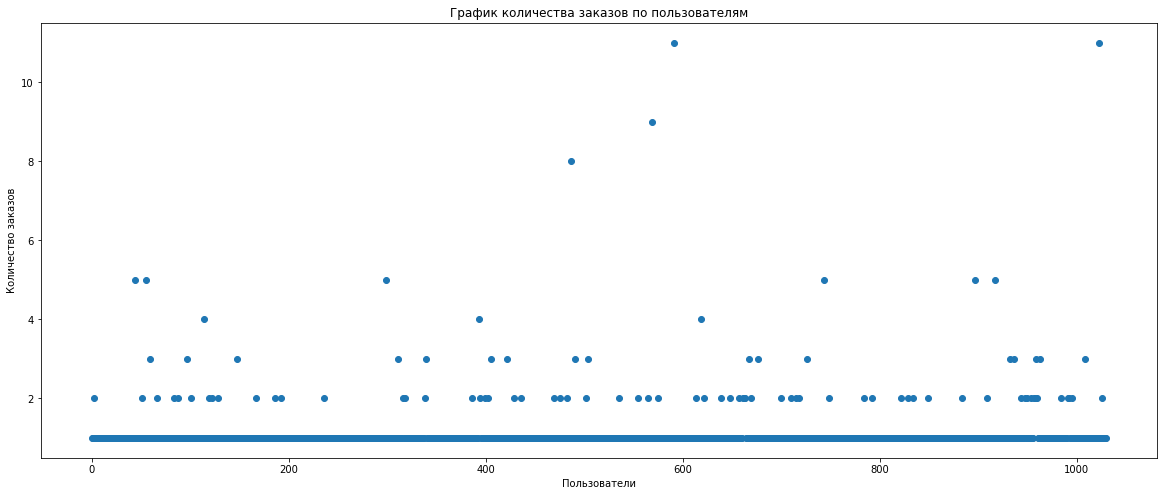

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(20,8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')

Большинство пользователей сделали по одному заказу. Выводы подтверждаются: много пользователей с 2 заказами. Их точная доля не ясна. 

##### Вывод

Большинство пользователей сделали по одному заказу. Достаточно много пользователей с 2 заказами. Пользователей, сделавших 3 заказа заметно меньше. Большее количество заказов сделали единицы пользователей.

#### Задача 7. 

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

##### Решение:

In [35]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

##### Вывод

Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% пользователей сделали 4 и более заказов.

Выберем 4 заказа на одного пользователя как нижнюю границу числа заказов для аномальных пользователей.

#### Задача 8.

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

##### Решение:

(array([1.171e+03, 2.100e+01, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.00000000e+01, 4.31983333e+04, 8.63466667e+04, 1.29495000e+05,
        1.72643333e+05, 2.15791667e+05, 2.58940000e+05, 3.02088333e+05,
        3.45236667e+05, 3.88385000e+05, 4.31533333e+05, 4.74681667e+05,
        5.17830000e+05, 5.60978333e+05, 6.04126667e+05, 6.47275000e+05,
        6.90423333e+05, 7.33571667e+05, 7.76720000e+05, 8.19868333e+05,
        8.63016667e+05, 9.06165000e+05, 9.49313333e+05, 9.92461667e+05,
        1.03561000e+06, 1.07875833e+06, 1.12190667e+06, 1.16505500e+06,
        1.20820333e+06, 1.25135167e+06, 1.29450000e+06]),
 <a list of 30 Patch objects>)

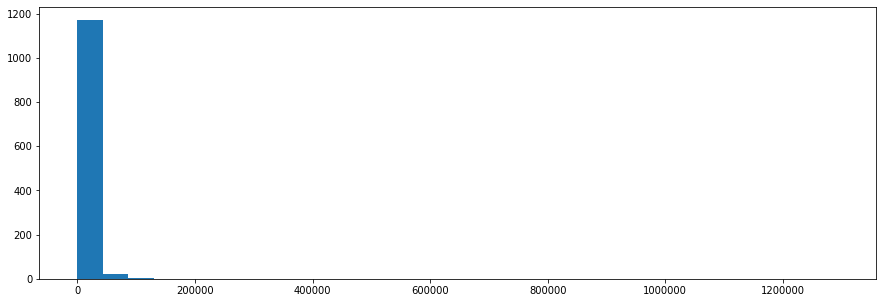

In [36]:
plt.figure(figsize=(15,5))
plt.hist(orders['revenue'], bins=30)

В данных явно есть заказы дороже 100 000 рублей. Однако большинство всё-таки имеет меньшую выручку.

Text(0.5, 1.0, 'График стоимостей заказов')

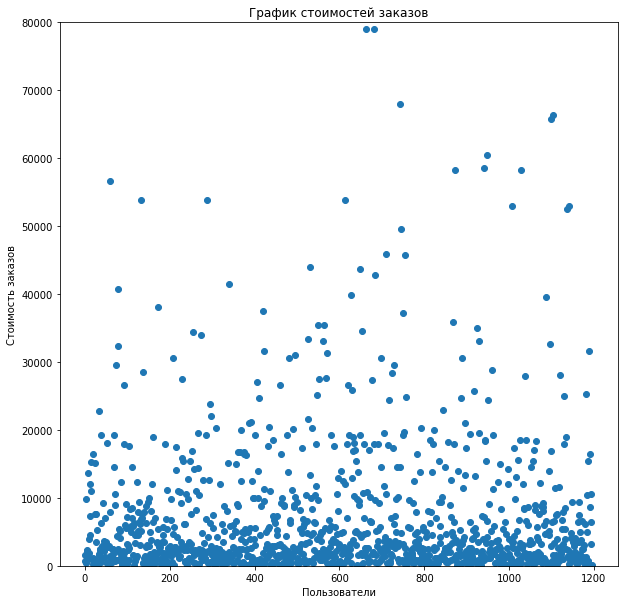

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,10))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 80000)
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title('График стоимостей заказов')

Подобрав оптимальную для просмотра общей картины границу оси у, получаем, что основная часть стоимостей заказов находится в промежутке от 0 до 20000.

##### Вывод

Основная часть заказов не превышает 20 000 рублей. Есть заказы и значительно дороже, но их количество небольшое.

#### Задача 9.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

##### Решение:

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

##### Вывод

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. В качестве границы для определения аномальных заказов выберем 50 000 руб.

#### Задача 10.

Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

##### Решение:

In [39]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [40]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = (pd.concat([ordersByUsersA['orders']
                      , pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                      , name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders']
                      ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                      , name='orders')],axis=0))

In [41]:
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Различия между конверсиями групп А и В {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA']
                                                                                      .sum()/data['visitorsPerDateA'].sum())-1))

p-value = 0.00840
Различия между конверсиями групп А и В 0.138


##### Вывод

p-value = 0.00840 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

#### Задача 11.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

##### Решение:

In [42]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Различия между средним чеком групп А и В {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Различия между средним чеком групп А и В 0.259


##### Вывод

p-value = 0.365 больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B преимущественно выше среднего чека группы A.

#### Задача 12.

Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

##### Решение:

In [43]:
usersWithManyOrders = (pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId']
                                  , ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']]
                                 , axis = 0))
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']

In [44]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders']
                             ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                                        ,name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders']
                             ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                        ,name='orders')],axis=0)

In [46]:
print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Различия между конверсиями групп А и В {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.00593
Различия между конверсиями групп А и В 0.160


##### Вывод

p-value = 0.00593 меньше 0.05.  Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

#### Задача 13.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

##### Решение:

In [47]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Различия между средним чеком групп А и В {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.358
Различия между средним чеком групп А и В 0.032


##### Вывод

p-value = 0.358 больше 0.05.

#### Задача 14.

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

##### Решение:

##### Конверсия
 Сырые данные:
- p-value = 0.00840  и Различия между конверсиями групп А и В  0.138 (конверсия)
Очищенные данные:
- p-value = 0.00593 и  Различия между конверсиями групп А и В  0.160 (конверсия)


##### Средний чек
 Сырые данные:
- p-value = 0.365 и   Различия между средним чеком групп А и В 0.259 (средний чек)
Очищенные данные:
- p-value =0.358 и   Различия между средним чеком групп А и В  0.032 (средний чек)

##### Вывод

Получаем:
- есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий;

- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- график различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.
Явно выделяется различие между средними чеками групп по "сырым" и "очищенным" данным.

Значит можем сделать вывод, что подходит вариант "1. Остановить тест, зафиксировать победу одной из групп". Победила группа В.

# Вывод

Объединяя результаты работы, отметим освновные результаты:
- по части 1 работы : по RICE и ICE получили в тройке приоритетных гипотез гипотезы номер 0 и номер 7.
- по части 2 работы : проведя анализ А/В тестирования, получили итоговый вывод об успешном завершении теста с победой группы В.